# ESTUDIOS ESPECÍFICOS: ESTUDIOS DE PERFORMANCE

Estudios de performance superpuesta y comparativos. Implementar estudios de performance de activos superpuestos en gráficos. O distintas variables del mismo activo (necesitan distinto eje Y). O bien mismo activo en distintos períodos de tiempo. Para buscar patrones, entender movimientos, buscar estacionalidades, etc. Para más detalle observar la descripción de las funciones debajo.

## INDICE DE FUNCIONES:

- plotPriceVolat(symbol, desde, hasta, n = 20, log = False): Esta función grafica precio y volatilidad de un ticker en particular entre dos fechas especificadas.
- plotPricePrice(symbols, desde, hasta, log = False): Esta función grafica la evolución de precios de dos tickers superpuestos.
- plotPerformance(ticker, years, log = False): Gráfico de evolución de precio de cierre para varios años (parametrizable) del mismo ticker. Permite visualizar estacionalidades, ver cómo se suele comportar en distintas épocas del año, etc.
- plotPerformanceIndex(ticker, years): Gráfico de evolución rendimiento acumulado base 100 del mismo ticker. Permite visualizar estacionalidades, ver cómo se suele comportar en distintas épocas del año, etc.

In [2]:
# FUNCIONES PARA OBTENER INFORMACIÓN FINANCIERA

import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import time

def getDataYf(ticker, tipo, interval, data_from = None, data_to = None, period = None):
    """
    Es una función para descargar market data de Yahoo Finance con la librería yfinance.
    
    ## Inputs:
        >ticker: el nombre del ticker.
        >tipo: si es "no end" no se indica hasta cuándo (data_to), se obtiene hasta el último día disponible. Si es "end" es
        necesario indicar hasta cuánto (data_to). En ambos casos hay que indicar desde qué fecha (data_from). Si es "period" 
        no se indica ni desde cuándo ni hasta cuándo, sólo el argumento "period" con la cantidad de tiempo a obtener.
        >now : si es True, no se indica hasta cuándo (data_to), se obtiene hasta el último día disponible. Si se indica False, es
        necesario indicar hasta cuánto (data_to).
        >interval: el timeframe (ej. 1mo, 1h, 1d, 1wk, etc)
        >data_from: data desde qué fecha.
        >data_to: data hasta qué fecha (no inclusive el día). Sólo es aplicable si now == True.
        >period : en caso de tipo = "period", se pasa este argumento que refiere a la cantidad de tiempo a obtener. Ej. 1y, 2y, 3y, etc.
        
    ## Outputs:
        >series OHLC ajustadas del ticker.
    """
    import yfinance as yf
    import pandas as pd
    
    if tipo == "no end":
        data = yf.download(ticker, start = data_from, interval = interval, progress = False, auto_adjust = True)
    elif tipo == "end":
        data = yf.download(ticker, start = data_from, end = data_to, interval = interval, progress = False, auto_adjust = True)
    elif tipo == "period":
        data = yf.download(ticker, interval = interval, period = period, progress = False, auto_adjust = True)
    return data



def getDataYfMulti(activos, tipo, interval, data_from = None, data_to = None, period = None, swap = True):
    """
    Función para hacer batch requests (varios tickers a la vez), que será la fx que más voy a utilizar para market data.
    
    ## Inputs:
        >tickers: es una lista con los tickers de los cuales se va a obtener market data.
        >tipo: si es "no end" no se indica hasta cuándo (data_to), se obtiene hasta el último día disponible. Si es "end" es
        necesario indicar hasta cuánto (data_to). En ambos casos hay que indicar desde qué fecha (data_from). Si es "period" 
        no se indica ni desde cuándo ni hasta cuándo, sólo el argumento "period" con la cantidad de tiempo a obtener.
        >now : si es True, no se indica hasta cuándo (data_to), se obtiene hasta el último día disponible. Si se indica False, es
        necesario indicar hasta cuánto (data_to).
        >interval: el timeframe (ej. 1mo, 1h, 1d, 1wk, etc)
        >data_from: data desde qué fecha.
        >data_to: data hasta qué fecha (no inclusive el día). Sólo es aplicable si now == True.
        >period : en caso de tipo = "period", se pasa este argumento que refiere a la cantidad de tiempo a obtener. Ej. 1y, 2y, 3y, etc.
        >swap : si es True, divide el df en tickers y cada uno tiene su OHLC. Si es False, tenemos cada columna OHLC y dentro todos los tickers.
        
    ## Outputs:
        >series OHLC ajustadas del ticker.
    """
    import yfinance as yf
    import pandas as pd
    
    lideres_arg = ["ALUA.BA", "BBAR.BA", "BMA.BA", "BYMA.BA", "CEPU.BA", "COME.BA", "CRES.BA", "CVH.BA", "EDN.BA", 
                   "GGAL.BA", "LOMA.BA", "MIRG.BA", "PAMP.BA", "SUPV.BA", "TECO2.BA", "TGNO4.BA", "TGSU2.BA", "TRAN.BA", 
                   "TXAR.BA", "VALO.BA", "YPFD.BA"]

    general_arg = ["AGRO.BA", "AUSO.BA", "BHIP.BA", "BOLT.BA", "BPAT.BA", "CADO.BA", "CAPX.BA", "CARC.BA", "CECO2.BA", 
                   "CELU.BA", "CGPA2.BA", "CTIO.BA", "DGCU2.BA", "FERR.BA", "FIPL.BA", "GAMI.BA", "GCDI.BA", "GCLA.BA", 
                   "HARG.BA", "HAVA.BA", "INVJ.BA", "IRSA.BA", "LEDE.BA", "LONG.BA", "METR.BA", "MOLA.BA", "MOLI.BA", 
                   "MORI.BA", "OEST.BA", "PATA.BA", "RICH.BA", "RIGO.BA", "SAMI.BA", "SEMI.BA"]

    cedears = ["AAL", "AAPL", "ABBV", "ABEV", "ABNB", "ABT", "ADBE", "ADGO", "ADI", "ADP", "AEM", "AIG", "AMAT", "AMD", 
               "AMGN", "AMZN", "AOCA", "ARCO", "ARKK", "ASR", "AUY", "AVGO", "AXP", "AZN", "BA", "BA.C", "BABA", "BB", 
               "BBD", "BBV", "BCS", "BHP", "BIDU", "BIIB", "BIOX", "BITF", "BK", "BMY", "BNG", "BP", "BRFS", "BRKB", "BSBR", 
               "C", "CAAP", "CAH", "CAR", "CAT", "CBRD", "CDE", "CL", "COIN", "COST", "CRM", "CS", "CSCO", "CVX", "CX", "DD", 
               "DE", "DESP", "DIA", "DISN", "DOCU", "DOW", "E", "EA", "EBAY", "EEM", "EFX", "ERIC", "ERJ", "ETSY", "EWZ", "F", 
               "FCX", "FDX", "FMX", "FSLR", "GE", "GFI", "GGB", "GILD", "GLOB", "GLW", "GM", "GOLD", "GOOGL", "GPRK", "GRMN", 
               "GS", "HAL", "HD", "HL", "HMC", "HMY", "HOG", "HON", "HPQ", "HSBC", "HSY", "HUT", "HWM", "IBM", "IFF", "INTC", 
               "ITUB", "IWM", "JD", "JMIA", "JNJ", "JPM", "KMB", "KO", "KOFM", "LLY", "LMT", "LRCX", "LVS", "LYG", "MA", "MCD", 
               "MDT", "MELI", "META", "MMM", "MO", "MOS", "MRK", "MSFT", "MSI", "MSTR", "MU", "NEM", "NFLX", "NGG", "NIO", "NKE", 
               "NOKA", "NTCO", "NTES", "NUE", "NVDA", "NVS", "ORAN", "ORCL", "OXY", "PAAS", "PAC", "PANW", "PBI", "PBR", "PCAR", 
               "PEP", "PFE", "PG", "PHG", "PKS", "PSX", "PYPL", "QCOM", "QQQ", "RBLX", "RIO", "RTX", "SAN", "SAP", "SATL", "SBUX", 
               "SCCO", "SE", "SHEL", "SHOP", "SI", "SID", "SLB", "SNAP", "SNOW", "SONY", "SPGI", "SPOT", "SPY", "SQ", "SYY", "T", 
               "TEFO", "TEN", "TGT", "TM", "TMO", "TRIP", "TRVV", "TSLA", "TSM", "TTE", "TV", "TWLO", "TXN", "TXR", "UAL", "UBER", 
               "UGP", "UL", "UNH", "UNP", "UPST", "USB", "V", "VALE", "VIST", "VIV", "VOD", "VZ", "WBA", "WFC", "WMT", "X", "XLE", 
               "XLF", "XOM", "XP", "YY", "ZM"]

    adrs = ["BBAR", "BMA", "CEPU", "CRESY", "EDN", "GGAL", "IRS", "LOMA", "PAM", "SUPV", "TEO", "TGS", "TS", "TX", "YPF"]

    sectors = ["XLC", "XLP", "XLY", "XLF", "XLV", "XLI", "XLRE", "XLU", "XBI", "XLB", "XLK", "XLE"]
    
    precarga = ["lideres", "general", "cedears", "adrs", "sectores"]
    precarga_dict = {"lideres" : lideres_arg, "general" : general_arg, "cedears" : cedears, "adrs" : adrs, "sectores" : sectors}
    
    if activos in precarga:
        activos = precarga_dict[activos]
    
    if tipo == "no end":
        data = yf.download(activos, start = data_from, interval = interval, progress = False, auto_adjust = True)
    elif tipo == "end":
        data = yf.download(activos, start = data_from, end = data_to, interval = interval, progress = False, auto_adjust = True)
    elif tipo == "period":
        data = yf.download(activos, interval = interval, period= period, progress = False, auto_adjust = True)
    
    if swap:
        #data = data.swaplevel(i = 0, j = 1, axis = 1)
        # Algoritmo para procesar el MultipleTicker download de yfinance
        dicto = {}
        low = data["Low"]
        high = data["High"]
        close = data["Close"]
        open = data["Open"]
        volume = data["Volume"]

        tickers = list(data["Close"].columns)

        for ticker in tickers:
            dicto[ticker] = {
                "Open" : open[ticker],
                "High" : high[ticker],
                "Low" : low[ticker],
                "Close" : close[ticker],
                "Volume" : volume[ticker]
            }

            dicto[ticker] = pd.DataFrame(dicto[ticker])
        return dicto
    return data

In [4]:
# FUNCIONALIDADES PRINCIPALES:

def plotPriceVolat(symbol, desde, hasta, n = 20, log = False):
    """
    Esta función grafica precio y volatilidad de un ticker en particular entre dos fechas especificadas"
    # Inputs:
        - symbol: ticker.
        - desde: fecha desde.
        - hasta: fecha hasta.
        - n : número de ruedas para la ventana de volatilidad
        - log: si es True, grafica a escala logarítmica, sino, lineal.
    # Outputs.
        - gráfico de precio y volatilidad en doble eje Y del ticker especificado, para las fechas especificadas.
    """
    
    import matplotlib.pyplot as plt
    import yfinance as yf
    import pandas as pd
    import numpy as np
    from datetime import datetime, timedelta
    import time
    
    plt.style.use('dark_background')
    data = getDataYf(symbol, tipo = "end", interval = "1d", data_from = desde, data_to = hasta)
    data["volatilidad"] = (data["Close"].pct_change().rolling(n).std()*252**0.5)*100   # Volatilidad de las últimas 20 ruedas anualizada %
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.plot(data["Close"], lw=1, color="tab:blue", label="Precio cierre")
    ax2 = ax1.twinx()
    ax2.plot(data["volatilidad"], lw=1.5, ls="--", color="tab:red", label=f"Volatilidad {n}r (anualizada)")
    plt.title(f"[{symbol}] - PRECIO Y VOLATILIDAD ANUALIZADA - {desde} al {hasta}", fontsize = 16)
    ax1.set_ylabel("PRECIO", fontsize=14)
    ax2.set_ylabel(f"% VOLATILIDAD {n} RUEDAS ANUALIZADA", fontsize=14)
    if log:
        ax1.set_yscale("log")
    fig.legend(loc = "upper right", fontsize = 8)
    plt.close()
    return fig


def plotPricePrice(symbols, desde, hasta, log = False):
    """
    Esta función grafica la evolución de precios de dos tickers superpuestos
    # Inputs:
        - symbols: tickers a comparar (2).
        - desde: fecha desde.
        - hasta: fecha hasta.
        - log: si es True, grafica a escala logarítmica, sino, lineal.
    # Outputs.
        - gráfico de precios en doble eje Y de los tickers especificados, para las fechas especificadas.
    """
    import matplotlib.pyplot as plt
    import yfinance as yf
    import pandas as pd
    import numpy as np
    from datetime import datetime, timedelta
    import time
    
    plt.style.use('dark_background')
    data = getDataYfMulti(symbols, tipo = "end", interval = "1d", data_from = desde, data_to = hasta, swap = False)["Close"]
    datas = {symbols[0] : data[symbols[0]], symbols[1] : data[symbols[1]]}
    
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.plot(datas[symbols[0]], lw=1, color="tab:blue", label=f"Precio cierre {symbols[0]}")
    ax2 = ax1.twinx()
    ax1.plot(datas[symbols[1]], lw=1, color="tab:green", label=f"Precio cierre {symbols[1]}")
    plt.title(f"[{symbols[0]}-{symbols[1]}] - COMPARATIVO DESEMPEÑO - {desde} al {hasta}", fontsize = 16)
    ax1.set_ylabel(f"PRECIO {symbols[0]}", fontsize=14)
    ax2.set_ylabel(f"PRECIO {symbols[1]}", fontsize=14)
    if log:
        ax1.set_yscale("log")
        ax2.set_yscale("log")
    fig.legend(loc = "upper right", fontsize = 8)
    plt.close()
    return fig


def plotPerformance(ticker, years, log = False):
    """
    Gráfico de evolución de precio de cierre para varios años (parametrizable) del mismo ticker. Permite visualizar estacionalidades,
    ver cómo se suele comportar en distintas épocas del año, etc."
    # Inputs:
        - ticker: el ticker del activo.
        - years: una lista con los años a analizar.
        - log: si es True, grafica a escala logarítmica, sino, lineal.
    # Outputs:
        - Gráfico de evolución de precio de cierre para varios años del mismo ticker.
    """
    
    import matplotlib.pyplot as plt
    import yfinance as yf
    import pandas as pd
    import numpy as np
    from datetime import datetime, timedelta
    import time
    
    now = datetime.now()
    yearr = now.year
    month = now.month
    day = now.day
    if int(datetime.now().year) == years[-1]:
        to = f"{yearr}-{month}-{day}"
    else:
        to = f"{yearr}-12-31"
    
    plt.style.use('dark_background')
    data = getDataYf(ticker, tipo = "end", interval = "1d", data_from = f"{np.array(years).min()}-01-01", data_to = to)

    precios = {}
    indices = {}
    for year in years:
        precios[year] = data["Close"].loc[(data.index >= str(year)) & (data.index < str((year+1)))]
        precios[year] = precios[year].reset_index(drop=True)

    fig, ax1 = plt.subplots(figsize=(10, 4))
    if log:
        ax1.set_yscale("log")
    ax1.set_ylabel("PRECIO DE CIERRE", fontsize = 14)
    ax1.set_xlabel("N° RUEDA DEL AÑO", fontsize = 14)
    fig.suptitle(f"[{ticker}] - Evolución de precios superpuesta. Años: {years}", fontsize = 18)
    colors = ["tab:blue", "tab:green", "tab:red", "tab:olive", "tab:purple", "tab:brown"]
    i = 0
    for year in years:
        color = colors[i]
        plt.plot(precios[year], lw=1, ls="-", c=color)
        i += 1
        
    plt.legend(years, loc="lower right")
    plt.close()
    return fig
    
def plotPerformanceIndex(ticker, years):
    """
    Gráfico de evolución rendimiento acumulado base 100 del mismo ticker. Permite visualizar estacionalidades,
    ver cómo se suele comportar en distintas épocas del año, etc."
    # Inputs:
        - ticker: el ticker del activo.
        - years: una lista con los años a analizar.
    # Outputs:
        - Gráfico de evolución de rendimiento acumulado base 100 para varios años del mismo ticker.
    """
    
    import matplotlib.pyplot as plt
    import yfinance as yf
    import pandas as pd
    import numpy as np
    from datetime import datetime, timedelta
    import time
    
    now = datetime.now()
    yearr = now.year
    month = now.month
    day = now.day
    if int(datetime.now().year) == years[-1]:
        to = f"{yearr}-{month}-{day}"
    else:
        to = f"{yearr}-12-31"
    
    plt.style.use('dark_background')
    data = getDataYf(ticker, tipo = "end", interval = "1d", data_from = f"{np.array(years).min()}-01-01", data_to = to)

    performance = {}
    indices = {}
    for year in years:
        performance[year] = ((data["Close"].loc[(data.index >= str(year)) & (data.index < str((year+1)))].pct_change() + 1).cumprod())*100
        performance[year] = performance[year].reset_index(drop=True)

    fig, ax1 = plt.subplots(figsize=(10, 4))
    ax1.set_ylabel("Rendimiento Acumulado (Base 100)", fontsize = 13)
    ax1.set_xlabel("N° RUEDA DEL AÑO", fontsize = 14)
    fig.suptitle(f"[{ticker}] - Evolución de performance superpuesta. Años: {years}", fontsize = 17)
    colors = ["tab:blue", "tab:green", "tab:red", "tab:purple", "tab:olive", "tab:cyan"]
    i = 0
    for year in years:
        color = colors[i]
        plt.plot(performance[year], lw=1, ls="-", c=color)
        i += 1
        
    plt.legend(years, loc="upper left")
    plt.close()
    return fig

In [5]:
grafico = plotPerformanceIndex(ticker = "TGS", years = [2018, 2019, 2020, 2021, 2022, 2023])

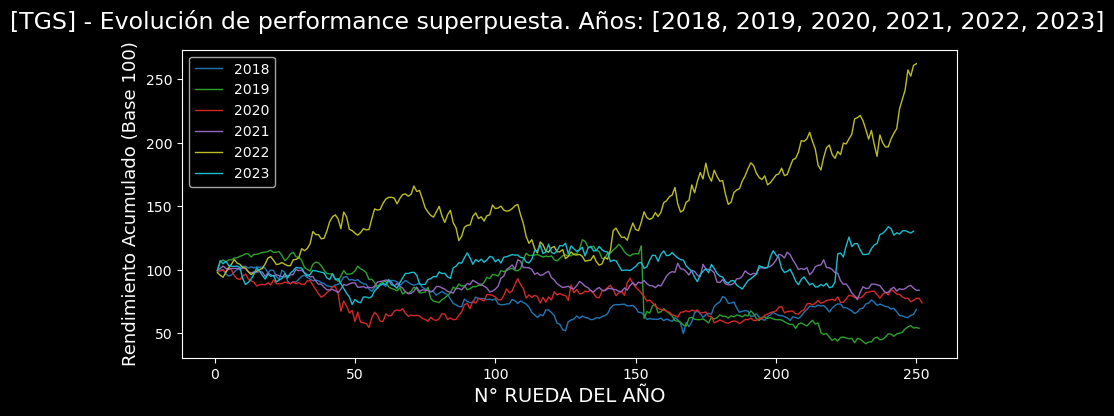

In [7]:
grafico

In [8]:
grafico = plotPriceVolat("KO", "2018-01-01", "2022-12-31", n = 30, log = False)

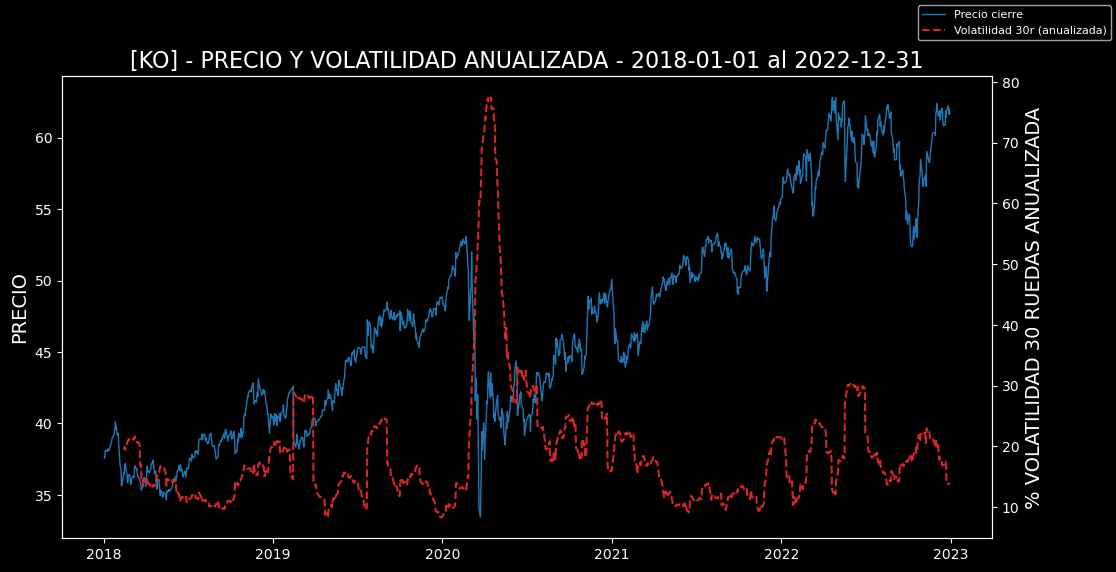

In [9]:
grafico

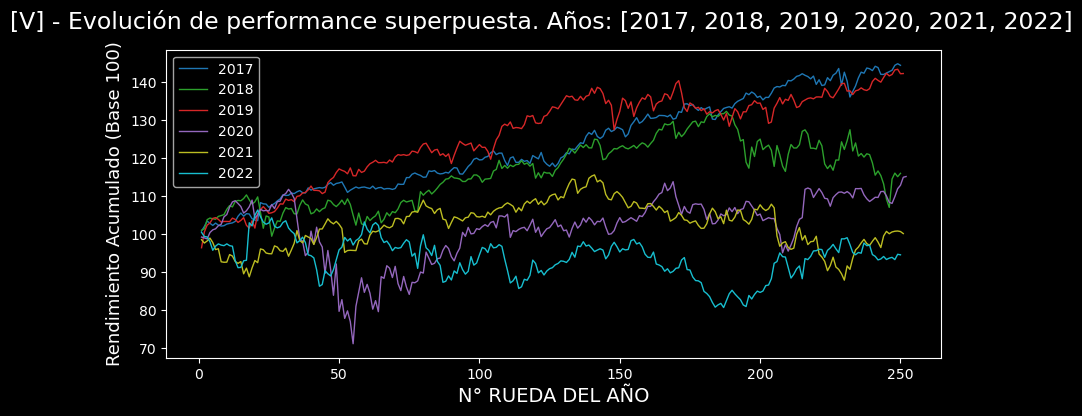

In [10]:
plotPerformanceIndex("V", [n for n in range(2017, 2023)])

In [11]:
grafico = plotPricePrice(["GGAL", "TSLA"], "2016-01-01", "2022-12-31", log = True)

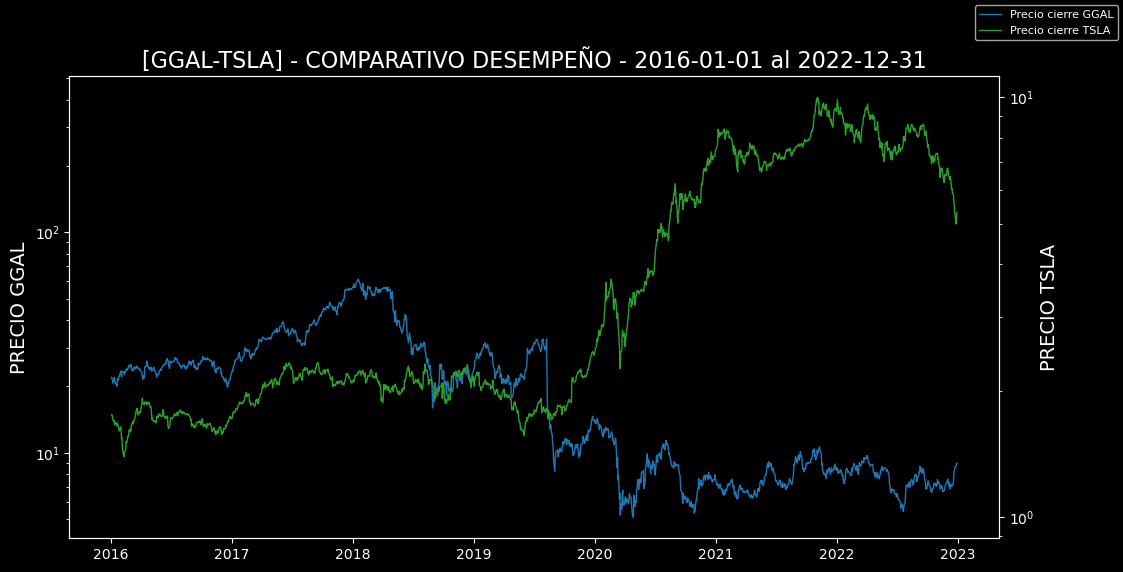

In [12]:
grafico

In [13]:
grafico = plotPerformance(ticker = "TGS", years=[2019, 2020, 2021, 2022, 2023], log = True)

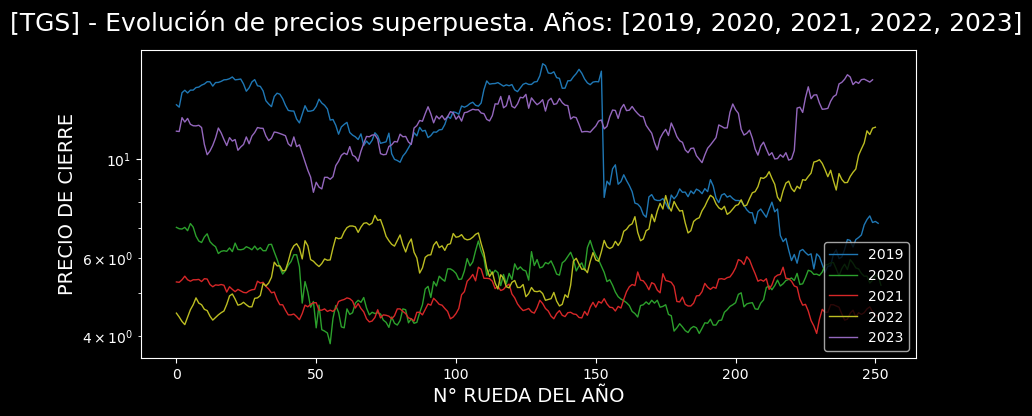

In [14]:
grafico